<a href="https://colab.research.google.com/github/Vaibhavsun/ML-TENSORQUEST/blob/main/MemeSentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("williamscott701/memotion-dataset-7k")

print("Path to dataset files:", path)

100%|██████████| 695M/695M [00:07<00:00, 95.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/williamscott701/memotion-dataset-7k/versions/1


In [4]:
import shutil
shutil.copytree(path,'/content/drive/MyDrive/MemeSent')

'/content/drive/MyDrive/MemeSent'

#EDA ON IMAGE DATA

In [5]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/MemeSent/memotion_dataset_7k/labels.csv')
data.head()

,Unnamed: 0,image_name,text_ocr,text_corrected,humour,sarcasm,offensive,motivational,overall_sentiment
0,0,image_1.jpg,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,hilarious,general,not_offensive,not_motivational,very_positive
1,1,image_2.jpeg,The best of #10 YearChallenge! Completed in le...,The best of #10 YearChallenge! Completed in le...,not_funny,general,not_offensive,motivational,very_positive
2,2,image_3.JPG,Sam Thorne @Strippin ( Follow Follow Saw every...,Sam Thorne @Strippin ( Follow Follow Saw every...,very_funny,not_sarcastic,not_offensive,not_motivational,positive
3,3,image_4.png,10 Year Challenge - Sweet Dee Edition,10 Year Challenge - Sweet Dee Edition,very_funny,twisted_meaning,very_offensive,motivational,positive
4,4,image_5.png,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,hilarious,very_twisted,very_offensive,not_motivational,neutral


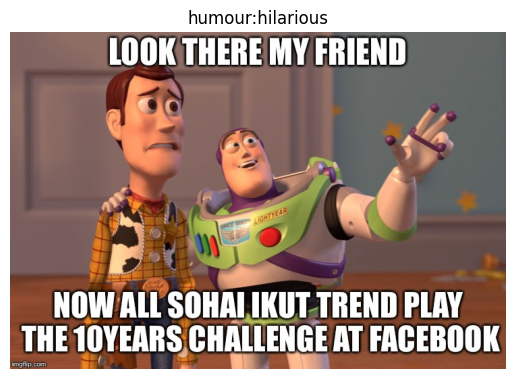

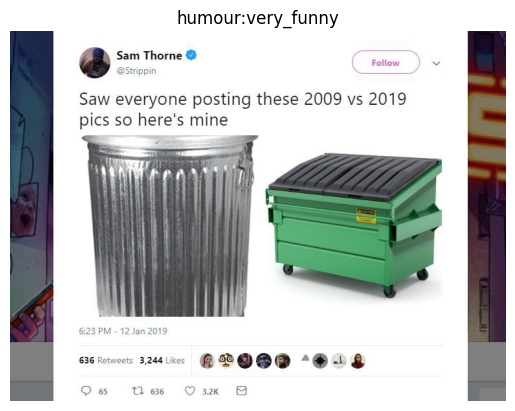

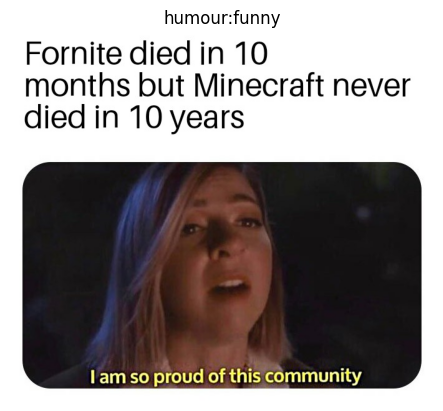

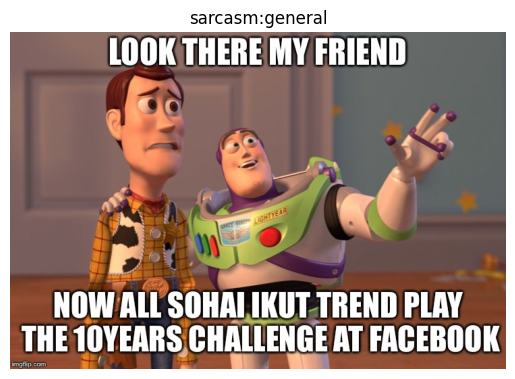

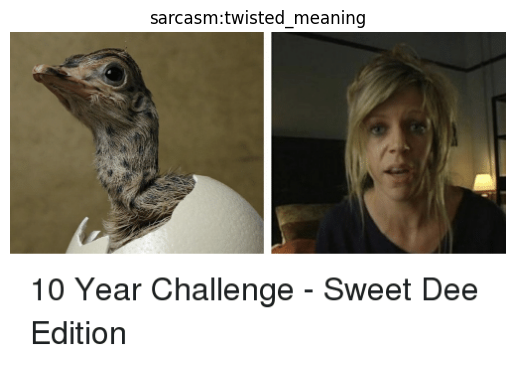

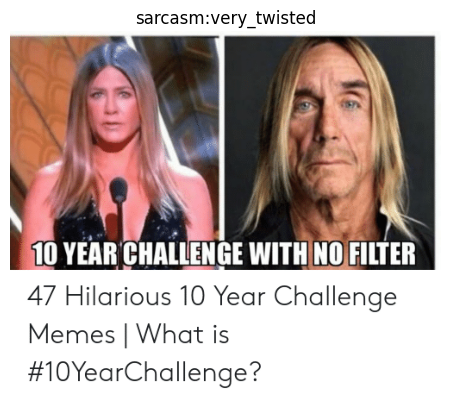

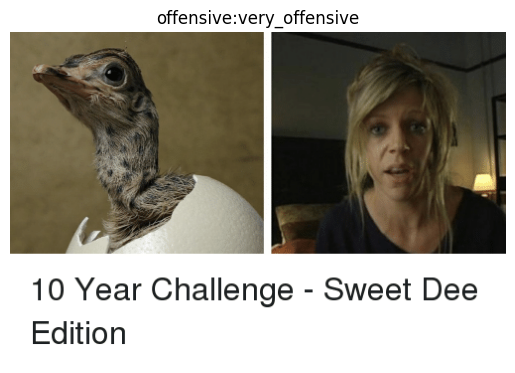

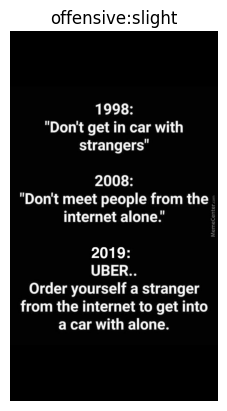

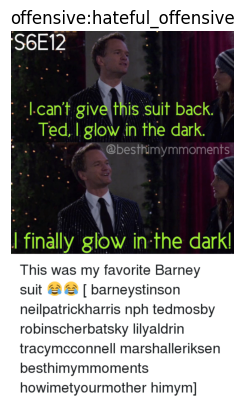

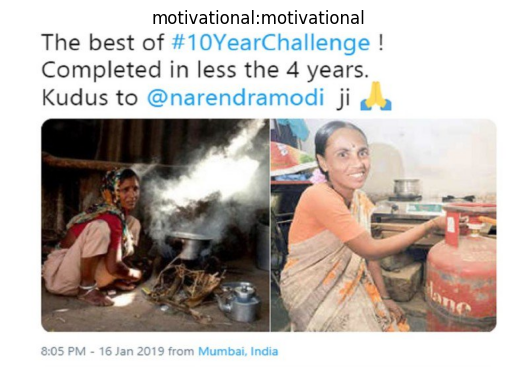

In [19]:
#Let Us See Each Class Image
import matplotlib.pyplot as plt
import cv2
MainClass=['humour','sarcasm','offensive','motivational']
for col in MainClass:
  for UniqLabel in data[col].unique():
    if 'not' in UniqLabel:
      continue
    plt.imshow(cv2.imread('/content/drive/MyDrive/MemeSent/memotion_dataset_7k/images/'+data[data[col]==UniqLabel]['image_name'].tolist()[0])[:,:,::-1])
    plt.title(col+':'+str(UniqLabel))
    plt.axis('off')
    plt.show()



In [21]:
data[data['overall_sentiment']=='very_positive']='positive'
data[data['overall_sentiment']=='very_negative']='negative'

<ipython-input-21-ebdc8153f4d2>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'positive' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data[data['overall_sentiment']=='very_positive']='positive'
